# Project: HRlytics – Employee Attrition Prediction


## Project Life Cycle

The typical life cycle of a machine learning project involves the following steps:

1. **Problem Definition** – Clearly state the business problem.
2. **Data Collection** – Gather relevant data from reliable sources.
3. **Data Understanding & EDA** – Explore the dataset, identify patterns, and clean it.
4. **Data Preprocessing & Feature Engineering** – Prepare features suitable for modeling.
5. **Model Building** – Train machine learning models.
6. **Model Evaluation** – Evaluate performance using appropriate metrics.
7. **Deployment** – Deploy the model in a production environment.
8. **Monitoring & Maintenance** – Continuously monitor and update the model.


## Problem Statement

Employee attrition is one of the major challenges for HR departments in organizations.  
High attrition leads to increased recruitment costs, loss of experienced talent, and reduced productivity.  

The goal of this project is to **predict whether an employee will leave the company (attrition)** based on historical employee data.  
This will enable HR teams to take proactive steps in employee retention.


## Data Collection

We will use the **IBM HR Analytics Employee Attrition & Performance dataset**, available on Kaggle.  
This dataset contains demographic, job-related, and performance details of employees, along with an attrition label.

- **Number of Rows:** 1470  
- **Number of Features (before cleaning):** 35 (including target variable `Attrition`)


## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [2]:
df=pd.read_csv('data/HRlytic-Attrition.csv')

## show top 5 records

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## getting shape of dataset

In [4]:
df.shape

(1470, 35)

## dataset information

📑 Features (Columns)

Here’s a categorized breakdown:

1. Demographic Information

Age

Gender

MaritalStatus

2. Job-related Information

BusinessTravel

Department

JobRole

JobLevel

JobSatisfaction

JobInvolvement

WorkLifeBalance

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

NumCompaniesWorked

TrainingTimesLastYear

OverTime

3. Compensation & Benefits

DailyRate

HourlyRate

MonthlyIncome

MonthlyRate

PercentSalaryHike

StockOptionLevel

4. Performance & Evaluation

EnvironmentSatisfaction

PerformanceRating

RelationshipSatisfaction

5. Educational Background

Education

EducationField

6. Target Variable

Attrition (Yes/No → whether an employee left the company)

## Some features (like EmployeeCount, Over18, StandardHours) have constant values and provide no useful information → we’ll likely drop them during EDA.

## 🔍 Data Quality Checks

Before proceeding with feature engineering and visualization, we need to perform some basic data quality checks to ensure the dataset is clean and ready for analysis. The following checks will be performed:

1. **Missing Values Check**  
   - Identify if any columns contain null or missing values.  
   - Helps decide whether to impute or drop features.

2. **Duplicate Records Check**  
   - Check if there are any duplicate rows in the dataset.  
   - Duplicates can bias the model and need to be removed.

3. **Data Types & Info**  
   - Inspect data types of each column.  
   - Ensures categorical and numerical features are properly identified.

4. **Unique Values in Categorical Columns**  
   - Explore unique values in object (categorical) columns.  
   - Helps understand categories and identify potential encoding requirements.

5. **Descriptive Statistics (Numerical Features)**  
   - Summarize mean, median, standard deviation, min, and max values.  
   - Useful to detect outliers and scaling needs.

6. **Class Distribution (Target Variable - Attrition)**  
   - Analyze the balance between "Yes" and "No" attrition classes.  
   - This helps confirm whether the dataset is imbalanced and if resampling (e.g., SMOTE) is needed.


## checking missing values

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## their is no missing values in this dataset

## checking for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

## their is no duplicated values

## check datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## checking the number of unique values of each column

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## check statistics of dataset

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 📊 Insights from Descriptive Statistics

- The **mean, minimum, and standard deviation** values vary significantly across numerical features.
- This indicates that the dataset contains features on **different scales** (e.g., `Age` ranges from 18–60, while `MonthlyIncome` goes into thousands).
- Features like `DailyRate`, `MonthlyIncome`, and `YearsAtCompany` have a **much larger spread** compared to features like `Education` or `WorkLifeBalance`, which are on smaller integer scales.
- Such scale differences can affect distance-based models (e.g., KNN, SVM, Logistic Regression with regularization).  
  → **Normalization or Standardization will be required** before model training.
- Some features (e.g., `YearsInCurrentRole`, `YearsAtCompany`, `YearsSinceLastPromotion`) may also show skewness or outliers, suggesting we should check distributions further using **histograms/boxplots**.


## seprate numerical and categorical feature

In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 26 numerical features : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

we have 9 categorical features : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


## unique values in categorical features

In [12]:
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()}")



Attrition: 2 unique values → ['Yes' 'No']
BusinessTravel: 3 unique values → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: 3 unique values → ['Sales' 'Research & Development' 'Human Resources']
EducationField: 6 unique values → ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: 2 unique values → ['Female' 'Male']
JobRole: 9 unique values → ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: 3 unique values → ['Single' 'Married' 'Divorced']
Over18: 1 unique values → ['Y']
OverTime: 2 unique values → ['Yes' 'No']


### 🔹 Insights from Categorical Features

1. **Attrition (Target Variable)**  
   - Only **2 unique values**: `Yes` and `No`.  
   - Confirms that this is a **binary classification problem**.

2. **BusinessTravel**  
   - 3 categories: `Travel_Rarely`, `Travel_Frequently`, `Non-Travel`.  
   - Multi-category nominal variable → suitable for **One-Hot Encoding**.

3. **Department**  
   - 3 categories: `Sales`, `Research & Development`, `Human Resources`.  
   - Multi-category nominal variable → **One-Hot Encoding**.

4. **EducationField**  
   - 6 categories: `Life Sciences`, `Other`, `Medical`, `Marketing`, `Technical Degree`, `Human Resources`.  
   - Multi-category nominal → **One-Hot Encoding**.

5. **Gender**  
   - 2 categories: `Female` and `Male`.  
   - Binary feature → **Label Encoding** is sufficient.

6. **JobRole**  
   - 9 categories, e.g., `Sales Executive`, `Research Scientist`, etc.  
   - Multi-category nominal → **One-Hot Encoding**.

7. **MaritalStatus**  
   - 3 categories: `Single`, `Married`, `Divorced`.  
   - Nominal → **One-Hot Encoding**.

8. **Over18**  
   - Only 1 unique value: `Y`.  
   - Provides **no information**, should be **dropped**.

9. **OverTime**  
   - 2 categories: `Yes` and `No`.  
   - Binary feature → **Label Encoding**.

## exploring numeric features

1.ploting heatmap for correlation to find out which features are higly correlated

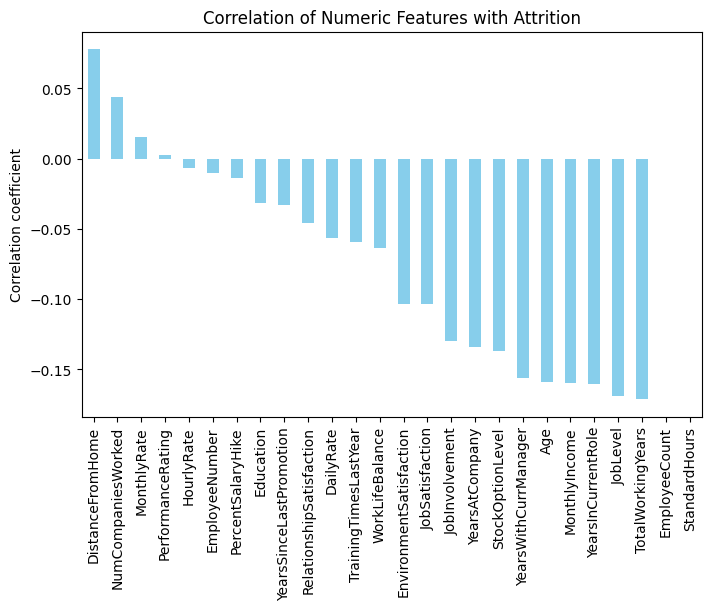

In [16]:
# Ensure target is numeric
df['Attrition_num'] = df['Attrition'].map({'No':0, 'Yes':1})

# Compute correlation with target
target_corr = df[numeric_features + ['Attrition_num']].corr()['Attrition_num'].sort_values(ascending=False)

# Plot as bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
target_corr.drop('Attrition_num').plot(kind='bar', color='skyblue')
plt.title("Correlation of Numeric Features with Attrition")
plt.ylabel("Correlation coefficient")
plt.show()



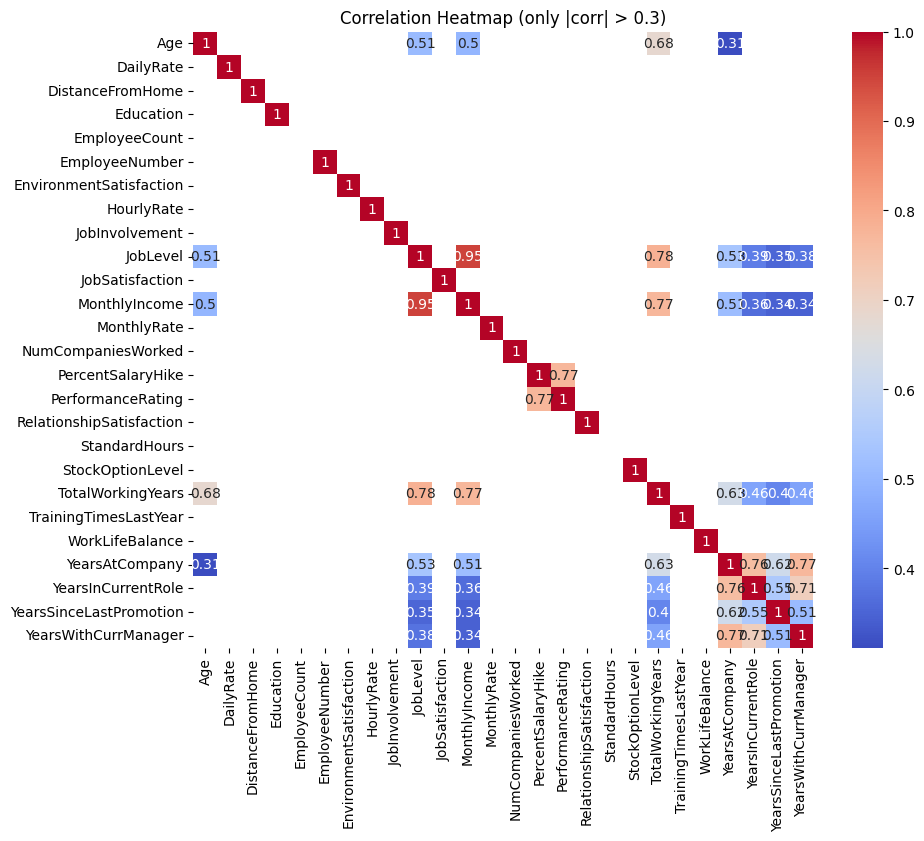

In [17]:


corr_matrix = df[numeric_features].corr()

# Mask low correlations
mask = np.abs(corr_matrix) < 0.3
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title("Correlation Heatmap (only |corr| > 0.3)")
plt.show()
